In [1]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
metrodata = pd.read_csv("MetroPT3(AirCompressor).csv")

In [3]:
metrodata.head()

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,10,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,20,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,30,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,40,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [4]:
metrodata = pd.read_csv("MetroPT3(AirCompressor).csv" , parse_dates=["timestamp"] , infer_datetime_format = True , index_col = "timestamp" , thousands = ',' , decimal = '.')

In [5]:
metrodata   

,Unnamed: 0,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
timestamp,,,,,,,,,,,,,,,,
2020-02-01 00:00:00,0,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-02-01 00:00:10,10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-02-01 00:00:19,20,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-02-01 00:00:29,30,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-02-01 00:00:39,40,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-01 03:59:10,15169430,-0.014,8.918,8.906,-0.022,8.918,59.675,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-09-01 03:59:20,15169440,-0.014,8.904,8.888,-0.020,8.904,59.600,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-09-01 03:59:30,15169450,-0.014,8.890,8.876,-0.022,8.892,59.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [6]:
metrodata = metrodata.drop("Unnamed: 0" , axis = 1)

# EDA

In [7]:
metrodata.head()

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
timestamp,,,,,,,,,,,,,,,
2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [8]:
metrodata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1516948 entries, 2020-02-01 00:00:00 to 2020-09-01 03:59:50
Data columns (total 15 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   TP2              1516948 non-null  float64
 1   TP3              1516948 non-null  float64
 2   H1               1516948 non-null  float64
 3   DV_pressure      1516948 non-null  float64
 4   Reservoirs       1516948 non-null  float64
 5   Oil_temperature  1516948 non-null  float64
 6   Motor_current    1516948 non-null  float64
 7   COMP             1516948 non-null  float64
 8   DV_eletric       1516948 non-null  float64
 9   Towers           1516948 non-null  float64
 10  MPG              1516948 non-null  float64
 11  LPS              1516948 non-null  float64
 12  Pressure_switch  1516948 non-null  float64
 13  Oil_level        1516948 non-null  float64
 14  Caudal_impulses  1516948 non-null  float64
dtypes: float64(15)
memory usage: 185.

In [9]:
metrodata.describe()

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
count,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06
mean,1.367826e+00,8.984611e+00,7.568155e+00,5.595619e-02,8.985233e+00,6.264418e+01,2.050171e+00,8.369568e-01,1.606106e-01,9.198483e-01,8.326640e-01,3.420025e-03,9.914368e-01,9.041556e-01,9.371066e-01
std,3.250930e+00,6.390951e-01,3.333200e+00,3.824015e-01,6.383070e-01,6.516261e+00,2.302053e+00,3.694052e-01,3.671716e-01,2.715280e-01,3.732757e-01,5.838091e-02,9.214078e-02,2.943779e-01,2.427712e-01
min,-3.200000e-02,7.300000e-01,-3.600000e-02,-3.200000e-02,7.120000e-01,1.540000e+01,2.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,-1.400000e-02,8.492000e+00,8.254000e+00,-2.200000e-02,8.494000e+00,5.777500e+01,4.000000e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
50%,-1.200000e-02,8.960000e+00,8.784000e+00,-2.000000e-02,8.960000e+00,6.270000e+01,4.500000e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
75%,-1.000000e-02,9.492000e+00,9.374000e+00,-1.800000e-02,9.492000e+00,6.725000e+01,3.807500e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
max,1.067600e+01,1.030200e+01,1.028800e+01,9.844000e+00,1.030000e+01,8.905000e+01,9.295000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [10]:
metrodata

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
timestamp,,,,,,,,,,,,,,,
2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-01 03:59:10,-0.014,8.918,8.906,-0.022,8.918,59.675,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-09-01 03:59:20,-0.014,8.904,8.888,-0.020,8.904,59.600,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-09-01 03:59:30,-0.014,8.890,8.876,-0.022,8.892,59.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [11]:
metrodata.corr()

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
TP2,1.000000,-0.011161,-0.961269,0.415025,-0.012403,0.250710,0.697480,-0.955521,0.947396,-0.616405,-0.941250,0.057651,-0.069532,0.013033,-0.010397
TP3,-0.011161,1.000000,0.224867,-0.153074,0.999993,0.401616,0.413756,0.103295,-0.078428,0.064937,0.088343,-0.324556,0.025240,-0.032829,-0.053179
H1,-0.961269,0.224867,1.000000,-0.425513,0.226037,-0.161810,-0.600178,0.971419,-0.958663,0.628964,0.954307,-0.133178,0.064769,-0.020691,-0.001900
DV_pressure,0.415025,-0.153074,-0.425513,1.000000,-0.153080,0.339697,0.302160,-0.423992,0.427813,-0.285256,-0.417284,0.011928,-0.088285,0.058520,0.042388
Reservoirs,-0.012403,0.999993,0.226037,-0.153080,1.000000,0.401647,0.412691,0.104509,-0.079640,0.065729,0.089555,-0.325235,0.025352,-0.032832,-0.052300
Oil_temperature,0.250710,0.401616,-0.161810,0.339697,0.401647,1.000000,0.528739,-0.233677,0.241678,-0.154531,-0.239154,-0.057989,-0.019560,-0.145239,-0.068120
Motor_current,0.697480,0.413756,-0.600178,0.302160,0.412691,0.528739,1.000000,-0.681326,0.689828,-0.439421,-0.683543,0.053664,-0.047003,-0.032793,-0.051145
COMP,-0.955521,0.103295,0.971419,-0.423992,0.104509,-0.233677,-0.681326,1.000000,-0.959307,0.668804,0.984555,-0.132727,0.183160,0.017974,0.050725
DV_eletric,0.947396,-0.078428,-0.958663,0.427813,-0.079640,0.241678,0.689828,-0.959307,1.000000,-0.607211,-0.975641,0.133922,0.014289,0.002478,-0.025202
Towers,-0.616405,0.064937,0.628964,-0.285256,0.065729,-0.154531,-0.439421,0.668804,-0.607211,1.000000,0.658474,-0.092452,0.262536,0.056029,0.087214


<AxesSubplot:xlabel='timestamp'>

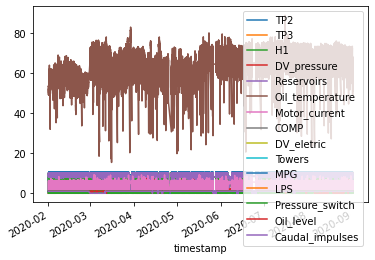

In [12]:
metrodata.plot()

taking the subset of the data for our actual project implementation based on the time duration of the 3rd fault (total 4 faults in the dataset)

In [13]:
metrodata1 = metrodata[878462:912357]  #metrodata1 will be our training data

In [14]:
metrodata1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33895 entries, 2020-06-04 00:00:05 to 2020-06-08 23:59:55
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TP2              33895 non-null  float64
 1   TP3              33895 non-null  float64
 2   H1               33895 non-null  float64
 3   DV_pressure      33895 non-null  float64
 4   Reservoirs       33895 non-null  float64
 5   Oil_temperature  33895 non-null  float64
 6   Motor_current    33895 non-null  float64
 7   COMP             33895 non-null  float64
 8   DV_eletric       33895 non-null  float64
 9   Towers           33895 non-null  float64
 10  MPG              33895 non-null  float64
 11  LPS              33895 non-null  float64
 12  Pressure_switch  33895 non-null  float64
 13  Oil_level        33895 non-null  float64
 14  Caudal_impulses  33895 non-null  float64
dtypes: float64(15)
memory usage: 4.1 MB


In [15]:
metrodata1.head()

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
timestamp,,,,,,,,,,,,,,,
2020-06-04 00:00:05,-0.014,8.302,8.292,-0.022,8.304,58.075,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-06-04 00:00:15,-0.012,8.288,8.278,-0.020,8.292,58.075,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-06-04 00:00:24,-0.012,8.278,8.266,-0.020,8.278,58.075,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-06-04 00:00:34,-0.012,8.266,8.256,-0.022,8.268,57.975,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-06-04 00:00:44,-0.012,8.252,8.242,-0.022,8.256,57.900,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [16]:
metrodata1

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
timestamp,,,,,,,,,,,,,,,
2020-06-04 00:00:05,-0.014,8.302,8.292,-0.022,8.304,58.075,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-06-04 00:00:15,-0.012,8.288,8.278,-0.020,8.292,58.075,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-06-04 00:00:24,-0.012,8.278,8.266,-0.020,8.278,58.075,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-06-04 00:00:34,-0.012,8.266,8.256,-0.022,8.268,57.975,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-06-04 00:00:44,-0.012,8.252,8.242,-0.022,8.256,57.900,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-08 23:59:15,-0.012,8.836,8.824,-0.022,8.838,61.775,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-06-08 23:59:25,-0.012,8.816,8.806,-0.024,8.818,61.550,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-06-08 23:59:35,-0.012,8.800,8.786,-0.022,8.800,61.450,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [17]:
metrodata1.describe()

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
count,33895.000000,33895.000000,33895.000000,33895.000000,33895.000000,33895.000000,33895.000000,33895.000000,33895.000000,33895.000000,33895.000000,33895.000000,33895.000000,33895.0,33895.0
mean,4.618324,8.474994,3.768784,1.057733,8.476185,69.956448,3.775127,0.418911,0.581089,0.710046,0.418911,0.015046,0.997227,1.0,1.0
std,3.998293,0.746500,4.461184,1.037899,0.745807,6.554661,2.365454,0.493388,0.493388,0.453748,0.493388,0.121740,0.052590,0.0,0.0
min,-0.028000,1.012000,-0.036000,-0.028000,0.996000,38.200000,0.035000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0
25%,-0.012000,8.052000,-0.008000,-0.020000,8.054000,63.775000,0.045000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.0
50%,7.120000,8.182000,-0.006000,1.478000,8.184000,74.100000,5.325000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.0,1.0
75%,8.202000,8.962000,8.794000,2.114000,8.962000,75.575000,5.557500,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.0,1.0
max,10.600000,10.262000,10.266000,6.060000,10.262000,78.025000,8.595000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0


In [18]:
metrodata1.corr()   

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
TP2,1.000000,-0.537682,-0.979014,0.864844,-0.537709,0.768925,0.867913,-0.981593,0.981593,-0.524415,-0.981593,0.041702,-0.029163,NaN,NaN
TP3,-0.537682,1.000000,0.655598,-0.632171,0.999996,-0.325070,-0.316031,0.616964,-0.616964,0.336178,0.616964,-0.443938,-0.000185,NaN,NaN
H1,-0.979014,0.655598,1.000000,-0.874941,0.655597,-0.751172,-0.835075,0.995901,-0.995901,0.540522,0.995901,-0.104707,0.029148,NaN,NaN
DV_pressure,0.864844,-0.632171,-0.874941,1.000000,-0.631696,0.866655,0.760641,-0.878393,0.878393,-0.466080,-0.878393,0.042022,-0.045000,NaN,NaN
Reservoirs,-0.537709,0.999996,0.655597,-0.631696,1.000000,-0.324572,-0.316213,0.616986,-0.616986,0.336180,0.616986,-0.444729,-0.000192,NaN,NaN
Oil_temperature,0.768925,-0.325070,-0.751172,0.866655,-0.324572,1.000000,0.832229,-0.784002,0.784002,-0.426276,-0.784002,-0.057365,-0.030288,NaN,NaN
Motor_current,0.867913,-0.316031,-0.835075,0.760641,-0.316213,0.832229,1.000000,-0.870819,0.870819,-0.469503,-0.870819,0.075878,-0.034834,NaN,NaN
COMP,-0.981593,0.616964,0.995901,-0.878393,0.616986,-0.784002,-0.870819,1.000000,-1.000000,0.542577,1.000000,-0.104942,0.028856,NaN,NaN
DV_eletric,0.981593,-0.616964,-0.995901,0.878393,-0.616986,0.784002,0.870819,-1.000000,1.000000,-0.542577,-1.000000,0.104942,-0.028856,NaN,NaN
Towers,-0.524415,0.336178,0.540522,-0.466080,0.336180,-0.426276,-0.469503,0.542577,-0.542577,1.000000,0.542577,-0.059352,0.009575,NaN,NaN


In [19]:
lps_array = metrodata1["LPS"].to_numpy()

# Feature extraction

Time domain feature extraction

In [20]:
def td_feature_matrix(data , window_size , min_periods , lps_arr):
    rolling_mean = data.rolling(window = window_size , min_periods=1 ).mean()
    rolling_std = data.rolling(window = window_size , min_periods=1 ).std()
    rolling_var          = data.rolling(window = window_size , min_periods=1 ).var()
    rolling_rms          = data.rolling(window = window_size , min_periods=1 ).apply(lambda x : np.sqrt(np.mean(x**2)))
    rolling_maxval       = data.rolling(window = window_size , min_periods=1 ).max()
    rolling_skew         = data.rolling(window = window_size , min_periods=1 ).skew()
    rolling_kurtosis     = data.rolling(window = window_size , min_periods=1 ).kurt()
    rolling_CFM          = rolling_maxval/rolling_rms
    rolling_marginfactor = rolling_maxval/rolling_var
    rolling_impulse      = rolling_maxval/rolling_mean
    rolling_afactor      = rolling_maxval/(rolling_std*rolling_var)
    rolling_bfactor      = (rolling_kurtosis*rolling_CFM)/rolling_std
    
    feature_matrix = pd.DataFrame({'MEAN'        : rolling_mean ,
                                   'STD '        : rolling_std ,
                                    'VARIANCE'   : rolling_var,
                                  'RMS'          : rolling_rms,
                                  'Peak Val'     : rolling_maxval,
                                  'Skewness'     : rolling_skew,
                                  'Kurtosis'     : rolling_kurtosis,
                                  'Crest Factor' : rolling_CFM ,
                                  'Margin_factor'  : rolling_marginfactor,
                                  'Impulse factor' : rolling_impulse,
                                  'A factor '  : rolling_afactor ,
                                  'B factor '   : rolling_bfactor,
                                  'LPS'       : lps_arr 
                                  })
    return feature_matrix


In [21]:
feature_matrix_TP2 = td_feature_matrix(metrodata1["TP2"] , 200 ,1 , lps_array)

In [22]:
feature_matrix_TP2.head()

,MEAN,STD,VARIANCE,RMS,Peak Val,Skewness,Kurtosis,Crest Factor,Margin_factor,Impulse factor,A factor,B factor,LPS
timestamp,,,,,,,,,,,,,
2020-06-04 00:00:05,-0.014000,NaN,NaN,0.014000,-0.014,NaN,NaN,-1.000000,NaN,1.000000,NaN,NaN,0.0
2020-06-04 00:00:15,-0.013000,0.001414,2.000000e-06,0.013038,-0.012,NaN,NaN,-0.920358,-6000.0,0.923077,-4.242641e+06,NaN,0.0
2020-06-04 00:00:24,-0.012667,0.001155,1.333333e-06,0.012702,-0.012,-1.732163,NaN,-0.944755,-9000.0,0.947368,-7.794229e+06,NaN,0.0
2020-06-04 00:00:34,-0.012500,0.001000,1.000000e-06,0.012530,-0.012,-2.000057,2.240535,-0.957704,-12000.0,0.960000,-1.200000e+07,-2145.769946,0.0
2020-06-04 00:00:44,-0.012400,0.000894,8.000000e-07,0.012426,-0.012,-2.236141,3.513300,-0.965734,-15000.0,0.967742,-1.677051e+07,-3793.393540,0.0


In [23]:
feature_matrix_TP3 = td_feature_matrix(metrodata1["TP3"] , 200 , 1 , lps_array)
feature_matrix_H1  =  td_feature_matrix(metrodata1["H1"] , 200 , 1 ,   lps_array)
feature_matrix_DVP = td_feature_matrix(metrodata1["DV_pressure"] , 200, 1 , lps_array)
feature_matrix_RES = td_feature_matrix(metrodata1["Reservoirs"]  , 200 , 1 , lps_array)
feature_matrix_OT  =  td_feature_matrix(metrodata1["Oil_temperature"] , 200 , 1 , lps_array)
feature_matrix_MC  =  td_feature_matrix(metrodata1["Motor_current"] , 200 ,1 , lps_array)

frequency domain features

In [24]:
from scipy.fftpack import fft

In [25]:
signal = metrodata1.iloc[: , -15].values

In [26]:
signal 

array([-0.014, -0.012, -0.012, ..., -0.012, -0.012, -0.014])

In [27]:
def get_mean_freq(signal, frame_size, hop_length):
    mean = [] 
    for i in range(0, len(signal), hop_length):
        L = len(signal[i:i+frame_size])
        y = abs(np.fft.fft(signal[i:i+frame_size]/L))[:int(L/2)]
        current_mean = np.sum(y)/frame_size
        mean.append(current_mean)
    return np.array(mean)

def get_variance_freq(signal, frame_size, hop_length):
    var = []
    for i in range(0, len(signal), hop_length):
        L = len(signal[i:i+frame_size])
        y = abs(np.fft.fft(signal[i:i+frame_size]/L))[:int(L/2)]
        current_var = (np.sum((y - (np.sum(y)/frame_size))**2))/(frame_size-1)
        var.append(current_var)
    return np.array(var)

def get_third_freq(signal, frame_size, hop_length):
    third = []
    for i in range(0, len(signal), hop_length):
        L = len(signal[i:i+frame_size])
        y = abs(np.fft.fft(signal[i:i+frame_size]/L))[:int(L/2)]
        current_third = (np.sum((y - (np.sum(y)/frame_size))**3))/(frame_size * (np.sqrt((np.sum((y - (np.sum(y)/frame_size))**2))/(frame_size-1)))**3)
        third.append(current_third)
    return np.array(third)

def get_forth_freq(signal, frame_size, hop_length):
    forth = []
    for i in range(0, len(signal), hop_length):
        L = len(signal[i:i+frame_size])
        y = abs(np.fft.fft(signal[i:i+frame_size]/L))[:int(L/2)]
        current_forth = (np.sum((y - (np.sum(y)/frame_size))**4))/(frame_size * ((np.sum((y - (np.sum(y)/frame_size))**2))/(frame_size-1))**2)
        forth.append(current_forth)
    return np.array(forth)

def get_grand_freq(signal, frame_size, hop_length):
    grand = []
    for i in range(0, len(signal), hop_length):
        L = len(signal[i:i+frame_size])
        y = abs(np.fft.fft(signal[i:i+frame_size]/L))[:int(L/2)]
        f = np.fft.fftfreq (L,.1/25600)[:int(L/2)] 
        current_grand = np.sum(f * y)/np.sum(y)
        grand.append(current_grand)
    return np.array(grand)

def get_std_freq(signal, frame_size, hop_length):
    std = []
    for i in range(0, len(signal), hop_length):
        L = len(signal[i:i+frame_size])
        y = abs(np.fft.fft(signal[i:i+frame_size]/L))[:int(L/2)]
        f = np.fft.fftfreq (L,.1/25600)[:int(L/2)] 
        current_std = np.sqrt(np.sum((f-(np.sum(f * y)/np.sum(y)))**2 * y)/frame_size)
        std.append(current_std)
    return np.array(std)

def get_Cfactor_freq(signal, frame_size, hop_length):
    cfactor = []
    for i in range(0, len(signal), hop_length):
        L = len(signal[i:i+frame_size])
        y = abs(np.fft.fft(signal[i:i+frame_size]/L))[:int(L/2)]
        f = np.fft.fftfreq (L,.1/25600)[:int(L/2)] 
        current_cfactor = np.sqrt(np.sum(f**2 * y)/np.sum(y))
        cfactor.append(current_cfactor)
    return np.array(cfactor)

def get_Dfactor_freq(signal, frame_size, hop_length):
    dfactor = []
    for i in range(0, len(signal), hop_length):
        L = len(signal[i:i+frame_size])
        y = abs(np.fft.fft(signal[i:i+frame_size]/L))[:int(L/2)]
        f = np.fft.fftfreq (L,.1/25600)[:int(L/2)] 
        current_dfactor = np.sqrt(np.sum(f**4 * y)/np.sum(f**2 * y))
        dfactor.append(current_dfactor)
    return np.array(dfactor)

def get_Efactor_freq(signal, frame_size, hop_length):
    efactor = []
    for i in range(0, len(signal), hop_length):
        L = len(signal[i:i+frame_size])
        y = abs(np.fft.fft(signal[i:i+frame_size]/L))[:int(L/2)]
        f = np.fft.fftfreq (L,.1/25600)[:int(L/2)] 
        current_efactor = np.sqrt(np.sum(f**2 * y)/np.sqrt(np.sum(y) * np.sum(f**4 * y)))
        efactor.append(current_efactor)
    return np.array(efactor)

def get_Gfactor_freq(signal, frame_size, hop_length):
    gfactor = []
    for i in range(0, len(signal), hop_length):
        L = len(signal[i:i+frame_size])
        y = abs(np.fft.fft(signal[i:i+frame_size]/L))[:int(L/2)]
        f = np.fft.fftfreq (L,.1/25600)[:int(L/2)] 
        current_gfactor = (np.sqrt(np.sum((f-(np.sum(f * y)/np.sum(y)))**2 * y)/frame_size))/(np.sum(f * y)/np.sum(y))
        gfactor.append(current_gfactor)
    return np.array(gfactor)

def get_third1_freq(signal, frame_size, hop_length):
    third1 = []
    for i in range(0, len(signal), hop_length):
        L = len(signal[i:i+frame_size])
        y = abs(np.fft.fft(signal[i:i+frame_size]/L))[:int(L/2)]
        f = np.fft.fftfreq (L,.1/25600)[:int(L/2)] 
        current_third1 = np.sum((f - (np.sum(f * y)/np.sum(y)))**3 * y)/(frame_size * (np.sqrt(np.sum((f-(np.sum(f * y)/np.sum(y)))**2 * y)/frame_size))**3)
        third1.append(current_third1)
    return np.array(third1)

def get_forth1_freq(signal, frame_size, hop_length):
    forth1 = []
    for i in range(0, len(signal), hop_length):
        L = len(signal[i:i+frame_size])
        y = abs(np.fft.fft(signal[i:i+frame_size]/L))[:int(L/2)]
        f = np.fft.fftfreq (L,.1/25600)[:int(L/2)] 
        current_forth1 = np.sum((f - (np.sum(f * y)/np.sum(y)))**4 * y)/(frame_size * (np.sqrt(np.sum((f-(np.sum(f * y)/np.sum(y)))**2 * y)/frame_size))**4)
        forth1.append(current_forth1)
    return np.array(forth1)

def get_Hfactor_freq(signal, frame_size, hop_length):
    hfactor = []
    for i in range(0, len(signal), hop_length):
        L = len(signal[i:i+frame_size])
        y = abs(np.fft.fft(signal[i:i+frame_size]/L))[:int(L/2)]
        f = np.fft.fftfreq (L,.1/25600)[:int(L/2)] 
        current_hfactor = np.sum(np.sqrt(abs(f - (np.sum(f * y)/np.sum(y)))) * y)/(frame_size * np.sqrt(np.sqrt(np.sum((f-(np.sum(f * y)/np.sum(y)))**2 * y)/frame_size)))
        hfactor.append(current_hfactor)
    return np.array(hfactor)

def get_Jfactor_freq(signal, frame_size, hop_length):
    jfactor = []
    for i in range(0, len(signal), hop_length):
        L = len(signal[i:i+frame_size])
        y = abs(np.fft.fft(signal[i:i+frame_size]/L))[:int(L/2)]
        f = np.fft.fftfreq (L,.1/25600)[:int(L/2)] 
        current_jfactor = np.sum(np.sqrt(abs(f - (np.sum(f * y)/np.sum(y)))) * y)/(frame_size * np.sqrt(np.sqrt(np.sum((f-(np.sum(f * y)/np.sum(y)))**2 * y)/frame_size)))
        jfactor.append(current_jfactor)
    return np.array(jfactor)


    
    
    
    

    
    

In [28]:
tp2_mean           =     get_mean_freq(signal , 200,1)
tp2_var_freq       =     get_variance_freq(signal , 200 ,1)
tp2_3_freq         =     get_third_freq(signal , 200 ,1)
tp2_4_freq         =     get_forth_freq(signal,200,1)
tp2_grand_freq     =     get_grand_freq(signal,200,1)
tp2_std_freq       =     get_std_freq(signal,200,1)
tp2_Cfactor_freq   =     get_Cfactor_freq(signal,200,1)
tp2_Dfactor_freq   =     get_Dfactor_freq(signal,200,1)
tp2_Efactor_freq   =     get_Efactor_freq(signal,200,1)
tp2_Gfactor_freq   =     get_Gfactor_freq(signal,200,1)
tp2_third1_freq    =     get_third1_freq(signal,200,1)
tp2_fourth1_freq   =     get_forth1_freq(signal,200,1)
tp2_Hfactor_freq   =     get_Hfactor_freq(signal,200,1)
tp2_Jfactor_freq   =     get_Jfactor_freq(signal,200,1)

C:\Users\tanma\AppData\Local\Temp\ipykernel_28660\2577802025.py:24: RuntimeWarning: invalid value encountered in double_scalars
  current_third = (np.sum((y - (np.sum(y)/frame_size))**3))/(frame_size * (np.sqrt((np.sum((y - (np.sum(y)/frame_size))**2))/(frame_size-1)))**3)
C:\Users\tanma\AppData\Local\Temp\ipykernel_28660\2577802025.py:33: RuntimeWarning: invalid value encountered in double_scalars
  current_forth = (np.sum((y - (np.sum(y)/frame_size))**4))/(frame_size * ((np.sum((y - (np.sum(y)/frame_size))**2))/(frame_size-1))**2)
C:\Users\tanma\AppData\Local\Temp\ipykernel_28660\2577802025.py:43: RuntimeWarning: invalid value encountered in double_scalars
  current_grand = np.sum(f * y)/np.sum(y)
C:\Users\tanma\AppData\Local\Temp\ipykernel_28660\2577802025.py:53: RuntimeWarning: invalid value encountered in double_scalars
  current_std = np.sqrt(np.sum((f-(np.sum(f * y)/np.sum(y)))**2 * y)/frame_size)
C:\Users\tanma\AppData\Local\Temp\ipykernel_28660\2577802025.py:63: RuntimeWarning

In [29]:
lps_arr = metrodata1.iloc[:,4].values

In [30]:
feat_matrix_tp2 = pd.DataFrame({'Mean' : tp2_mean,
                               'var_freq' : tp2_var_freq,
                               'Third freq' : tp2_3_freq,
                               'Fourth freq' : tp2_4_freq,
                               'grand_freq' : tp2_grand_freq,
                               'std_freq' : tp2_std_freq ,
                               'cfactor' : tp2_Cfactor_freq ,
                               'Dfactor' : tp2_Dfactor_freq,
                               'Efactor' : tp2_Efactor_freq,
                               'Gfactor' : tp2_Gfactor_freq,
                               'Third1' : tp2_third1_freq,
                               'fourth1' : tp2_fourth1_freq,
                               'Hfactor' : tp2_Hfactor_freq,
                               'Jfactor' : tp2_Jfactor_freq,
                               'LPS' : lps_arr
                               })

In [31]:
feat_matrix_tp2.head()

,Mean,var_freq,Third freq,Fourth freq,grand_freq,std_freq,cfactor,Dfactor,Efactor,Gfactor,Third1,fourth1,Hfactor,Jfactor,LPS
0,0.073877,0.025589,5.249254,31.605836,32045.602907,9443.359435,47265.468072,92588.851094,0.714484,0.294685,4.156796,42.599622,0.119650,0.119650,8.304
1,0.074368,0.026669,5.201662,31.642289,29918.278027,9009.059140,44569.821992,91512.360824,0.697880,0.301122,4.723170,49.850405,0.117580,0.117580,8.292
2,0.074372,0.026668,5.201678,31.642048,29921.886741,9009.832686,44573.713843,91513.040846,0.697908,0.301112,4.722109,49.836797,0.117589,0.117589,8.278
3,0.074372,0.026668,5.201570,31.640760,29921.116763,9009.453167,44572.166979,91510.945041,0.697903,0.301107,4.722276,49.840777,0.117588,0.117588,8.268
4,0.074372,0.026667,5.201491,31.639638,29921.030867,9009.464287,44572.158355,91511.976215,0.697899,0.301108,4.722441,49.842486,0.117586,0.117586,8.256


In [32]:

signal = metrodata1.iloc[: , -14].values



tp3_mean           =     get_mean_freq(signal , 200,1)
tp3_var_freq       =     get_variance_freq(signal , 200 ,1)
tp3_3_freq         =     get_third_freq(signal , 200 ,1)
tp3_4_freq         =     get_forth_freq(signal,200,1)
tp3_grand_freq     =     get_grand_freq(signal,200,1)
tp3_std_freq       =     get_std_freq(signal,200,1)
tp3_Cfactor_freq   =     get_Cfactor_freq(signal,200,1)
tp3_Dfactor_freq   =     get_Dfactor_freq(signal,200,1)
tp3_Efactor_freq   =     get_Efactor_freq(signal,200,1)
tp3_Gfactor_freq   =     get_Gfactor_freq(signal,200,1)
tp3_third1_freq    =     get_third1_freq(signal,200,1)
tp3_fourth1_freq   =     get_forth1_freq(signal,200,1)
tp3_Hfactor_freq   =     get_Hfactor_freq(signal,200,1)
tp3_Jfactor_freq   =     get_Jfactor_freq(signal,200,1)


feat_matrix_tp3 = pd.DataFrame({'Mean' : tp3_mean,
                               'var_freq' : tp3_var_freq,
                               'Third freq' : tp3_3_freq,
                               'Fourth freq' : tp3_4_freq,
                               'grand_freq' : tp3_grand_freq,
                               'std_freq' : tp3_std_freq ,
                               'cfactor' : tp3_Cfactor_freq ,
                               'Dfactor' : tp3_Dfactor_freq,
                               'Efactor' : tp3_Efactor_freq,
                               'Gfactor' : tp3_Gfactor_freq,
                               'Third1' : tp3_third1_freq,
                               'fourth1' : tp3_fourth1_freq,
                               'Hfactor' : tp3_Hfactor_freq,
                               'Jfactor' : tp3_Jfactor_freq,
                               'LPS' : lps_arr
                               })


C:\Users\tanma\AppData\Local\Temp\ipykernel_28660\2577802025.py:24: RuntimeWarning: invalid value encountered in double_scalars
  current_third = (np.sum((y - (np.sum(y)/frame_size))**3))/(frame_size * (np.sqrt((np.sum((y - (np.sum(y)/frame_size))**2))/(frame_size-1)))**3)
C:\Users\tanma\AppData\Local\Temp\ipykernel_28660\2577802025.py:33: RuntimeWarning: invalid value encountered in double_scalars
  current_forth = (np.sum((y - (np.sum(y)/frame_size))**4))/(frame_size * ((np.sum((y - (np.sum(y)/frame_size))**2))/(frame_size-1))**2)
C:\Users\tanma\AppData\Local\Temp\ipykernel_28660\2577802025.py:43: RuntimeWarning: invalid value encountered in double_scalars
  current_grand = np.sum(f * y)/np.sum(y)
C:\Users\tanma\AppData\Local\Temp\ipykernel_28660\2577802025.py:53: RuntimeWarning: invalid value encountered in double_scalars
  current_std = np.sqrt(np.sum((f-(np.sum(f * y)/np.sum(y)))**2 * y)/frame_size)
C:\Users\tanma\AppData\Local\Temp\ipykernel_28660\2577802025.py:63: RuntimeWarning

In [33]:
signal = metrodata1.iloc[: , -13].values



h1_mean           =     get_mean_freq(signal , 200,1)
h1_var_freq       =     get_variance_freq(signal , 200 ,1)
h1_3_freq         =     get_third_freq(signal , 200 ,1)
h1_4_freq         =     get_forth_freq(signal,200,1)
h1_grand_freq     =     get_grand_freq(signal,200,1)
h1_std_freq       =     get_std_freq(signal,200,1)
h1_Cfactor_freq   =     get_Cfactor_freq(signal,200,1)
h1_Dfactor_freq   =     get_Dfactor_freq(signal,200,1)
h1_Efactor_freq   =     get_Efactor_freq(signal,200,1)
h1_Gfactor_freq   =     get_Gfactor_freq(signal,200,1)
h1_third1_freq    =     get_third1_freq(signal,200,1)
h1_fourth1_freq   =     get_forth1_freq(signal,200,1)
h1_Hfactor_freq   =     get_Hfactor_freq(signal,200,1)
h1_Jfactor_freq   =     get_Jfactor_freq(signal,200,1)


feat_matrix_h1 = pd.DataFrame({'Mean' : h1_mean,
                               'var_freq' : h1_var_freq,
                               'Third freq' : h1_3_freq,
                               'Fourth freq' : h1_4_freq,
                               'grand_freq' : h1_grand_freq,
                               'std_freq' : h1_std_freq ,
                               'cfactor' : h1_Cfactor_freq ,
                               'Dfactor' : h1_Dfactor_freq,
                               'Efactor' : h1_Efactor_freq,
                               'Gfactor' : h1_Gfactor_freq,
                               'Third1' : h1_third1_freq,
                               'fourth1' : h1_fourth1_freq,
                               'Hfactor' : h1_Hfactor_freq,
                               'Jfactor' : h1_Jfactor_freq,
                               'LPS' : lps_arr
                               })


C:\Users\tanma\AppData\Local\Temp\ipykernel_28660\2577802025.py:24: RuntimeWarning: invalid value encountered in double_scalars
  current_third = (np.sum((y - (np.sum(y)/frame_size))**3))/(frame_size * (np.sqrt((np.sum((y - (np.sum(y)/frame_size))**2))/(frame_size-1)))**3)
C:\Users\tanma\AppData\Local\Temp\ipykernel_28660\2577802025.py:33: RuntimeWarning: invalid value encountered in double_scalars
  current_forth = (np.sum((y - (np.sum(y)/frame_size))**4))/(frame_size * ((np.sum((y - (np.sum(y)/frame_size))**2))/(frame_size-1))**2)
C:\Users\tanma\AppData\Local\Temp\ipykernel_28660\2577802025.py:43: RuntimeWarning: invalid value encountered in double_scalars
  current_grand = np.sum(f * y)/np.sum(y)
C:\Users\tanma\AppData\Local\Temp\ipykernel_28660\2577802025.py:53: RuntimeWarning: invalid value encountered in double_scalars
  current_std = np.sqrt(np.sum((f-(np.sum(f * y)/np.sum(y)))**2 * y)/frame_size)
C:\Users\tanma\AppData\Local\Temp\ipykernel_28660\2577802025.py:63: RuntimeWarning

In [34]:
signal = metrodata1.iloc[: , -12].values



dvp_mean           =     get_mean_freq(signal , 200,1)
dvp_var_freq       =     get_variance_freq(signal , 200 ,1)
dvp_3_freq         =     get_third_freq(signal , 200 ,1)
dvp_4_freq         =     get_forth_freq(signal,200,1)
dvp_grand_freq     =     get_grand_freq(signal,200,1)
dvp_std_freq       =     get_std_freq(signal,200,1)
dvp_Cfactor_freq   =     get_Cfactor_freq(signal,200,1)
dvp_Dfactor_freq   =     get_Dfactor_freq(signal,200,1)
dvp_Efactor_freq   =     get_Efactor_freq(signal,200,1)
dvp_Gfactor_freq   =     get_Gfactor_freq(signal,200,1)
dvp_third1_freq    =     get_third1_freq(signal,200,1)
dvp_fourth1_freq   =     get_forth1_freq(signal,200,1)
dvp_Hfactor_freq   =     get_Hfactor_freq(signal,200,1)
dvp_Jfactor_freq   =     get_Jfactor_freq(signal,200,1)


feat_matrix_dvp = pd.DataFrame({'Mean' : dvp_mean,
                               'var_freq' : dvp_var_freq,
                               'Third freq' : dvp_3_freq,
                               'Fourth freq' : dvp_4_freq,
                               'grand_freq' : dvp_grand_freq,
                               'std_freq' : dvp_std_freq ,
                               'cfactor' : dvp_Cfactor_freq ,
                               'Dfactor' : dvp_Dfactor_freq,
                               'Efactor' : dvp_Efactor_freq,
                               'Gfactor' : dvp_Gfactor_freq,
                               'Third1' : dvp_third1_freq,
                               'fourth1' : dvp_fourth1_freq,
                               'Hfactor' : dvp_Hfactor_freq,
                               'Jfactor' : dvp_Jfactor_freq,
                               'LPS' : lps_arr
                               })


C:\Users\tanma\AppData\Local\Temp\ipykernel_28660\2577802025.py:24: RuntimeWarning: invalid value encountered in double_scalars
  current_third = (np.sum((y - (np.sum(y)/frame_size))**3))/(frame_size * (np.sqrt((np.sum((y - (np.sum(y)/frame_size))**2))/(frame_size-1)))**3)
C:\Users\tanma\AppData\Local\Temp\ipykernel_28660\2577802025.py:33: RuntimeWarning: invalid value encountered in double_scalars
  current_forth = (np.sum((y - (np.sum(y)/frame_size))**4))/(frame_size * ((np.sum((y - (np.sum(y)/frame_size))**2))/(frame_size-1))**2)
C:\Users\tanma\AppData\Local\Temp\ipykernel_28660\2577802025.py:43: RuntimeWarning: invalid value encountered in double_scalars
  current_grand = np.sum(f * y)/np.sum(y)
C:\Users\tanma\AppData\Local\Temp\ipykernel_28660\2577802025.py:53: RuntimeWarning: invalid value encountered in double_scalars
  current_std = np.sqrt(np.sum((f-(np.sum(f * y)/np.sum(y)))**2 * y)/frame_size)
C:\Users\tanma\AppData\Local\Temp\ipykernel_28660\2577802025.py:63: RuntimeWarning

In [35]:
signal = metrodata1.iloc[: , -11].values



res_mean           =     get_mean_freq(signal , 200,1)
res_var_freq       =     get_variance_freq(signal , 200 ,1)
res_3_freq         =     get_third_freq(signal , 200 ,1)
res_4_freq         =     get_forth_freq(signal,200,1)
res_grand_freq     =     get_grand_freq(signal,200,1)
res_std_freq       =     get_std_freq(signal,200,1)
res_Cfactor_freq   =     get_Cfactor_freq(signal,200,1)
res_Dfactor_freq   =     get_Dfactor_freq(signal,200,1)
res_Efactor_freq   =     get_Efactor_freq(signal,200,1)
res_Gfactor_freq   =     get_Gfactor_freq(signal,200,1)
res_third1_freq    =     get_third1_freq(signal,200,1)
res_fourth1_freq   =     get_forth1_freq(signal,200,1)
res_Hfactor_freq   =     get_Hfactor_freq(signal,200,1)
res_Jfactor_freq   =     get_Jfactor_freq(signal,200,1)


feat_matrix_res = pd.DataFrame({'Mean' : res_mean,
                               'var_freq' : res_var_freq,
                               'Third freq' : res_3_freq,
                               'Fourth freq' : res_4_freq,
                               'grand_freq' : res_grand_freq,
                               'std_freq' : res_std_freq ,
                               'cfactor' : res_Cfactor_freq ,
                               'Dfactor' : res_Dfactor_freq,
                               'Efactor' : res_Efactor_freq,
                               'Gfactor' : res_Gfactor_freq,
                               'Third1' : res_third1_freq,
                               'fourth1' : res_fourth1_freq,
                               'Hfactor' : res_Hfactor_freq,
                               'Jfactor' : res_Jfactor_freq,
                               'LPS' : lps_arr
                               })


C:\Users\tanma\AppData\Local\Temp\ipykernel_28660\2577802025.py:24: RuntimeWarning: invalid value encountered in double_scalars
  current_third = (np.sum((y - (np.sum(y)/frame_size))**3))/(frame_size * (np.sqrt((np.sum((y - (np.sum(y)/frame_size))**2))/(frame_size-1)))**3)
C:\Users\tanma\AppData\Local\Temp\ipykernel_28660\2577802025.py:33: RuntimeWarning: invalid value encountered in double_scalars
  current_forth = (np.sum((y - (np.sum(y)/frame_size))**4))/(frame_size * ((np.sum((y - (np.sum(y)/frame_size))**2))/(frame_size-1))**2)
C:\Users\tanma\AppData\Local\Temp\ipykernel_28660\2577802025.py:43: RuntimeWarning: invalid value encountered in double_scalars
  current_grand = np.sum(f * y)/np.sum(y)
C:\Users\tanma\AppData\Local\Temp\ipykernel_28660\2577802025.py:53: RuntimeWarning: invalid value encountered in double_scalars
  current_std = np.sqrt(np.sum((f-(np.sum(f * y)/np.sum(y)))**2 * y)/frame_size)
C:\Users\tanma\AppData\Local\Temp\ipykernel_28660\2577802025.py:63: RuntimeWarning

In [36]:
signal = metrodata1.iloc[: , -10].values



ot_mean           =     get_mean_freq(signal , 200,1)
ot_var_freq       =     get_variance_freq(signal , 200 ,1)
ot_3_freq         =     get_third_freq(signal , 200 ,1)
ot_4_freq         =     get_forth_freq(signal,200,1)
ot_grand_freq     =     get_grand_freq(signal,200,1)
ot_std_freq       =     get_std_freq(signal,200,1)
ot_Cfactor_freq   =     get_Cfactor_freq(signal,200,1)
ot_Dfactor_freq   =     get_Dfactor_freq(signal,200,1)
ot_Efactor_freq   =     get_Efactor_freq(signal,200,1)
ot_Gfactor_freq   =     get_Gfactor_freq(signal,200,1)
ot_third1_freq    =     get_third1_freq(signal,200,1)
ot_fourth1_freq   =     get_forth1_freq(signal,200,1)
ot_Hfactor_freq   =     get_Hfactor_freq(signal,200,1)
ot_Jfactor_freq   =     get_Jfactor_freq(signal,200,1)


feat_matrix_ot = pd.DataFrame({'Mean' : ot_mean,
                               'var_freq' : ot_var_freq,
                               'Third freq' : ot_3_freq,
                               'Fourth freq' : ot_4_freq,
                               'grand_freq' : ot_grand_freq,
                               'std_freq' : ot_std_freq ,
                               'cfactor' : ot_Cfactor_freq ,
                               'Dfactor' : ot_Dfactor_freq,
                               'Efactor' : ot_Efactor_freq,
                               'Gfactor' : ot_Gfactor_freq,
                               'Third1' : ot_third1_freq,
                               'fourth1' : ot_fourth1_freq,
                               'Hfactor' : ot_Hfactor_freq,
                               'Jfactor' : ot_Jfactor_freq,
                               'LPS' : lps_arr
                               })


C:\Users\tanma\AppData\Local\Temp\ipykernel_28660\2577802025.py:24: RuntimeWarning: invalid value encountered in double_scalars
  current_third = (np.sum((y - (np.sum(y)/frame_size))**3))/(frame_size * (np.sqrt((np.sum((y - (np.sum(y)/frame_size))**2))/(frame_size-1)))**3)
C:\Users\tanma\AppData\Local\Temp\ipykernel_28660\2577802025.py:33: RuntimeWarning: invalid value encountered in double_scalars
  current_forth = (np.sum((y - (np.sum(y)/frame_size))**4))/(frame_size * ((np.sum((y - (np.sum(y)/frame_size))**2))/(frame_size-1))**2)
C:\Users\tanma\AppData\Local\Temp\ipykernel_28660\2577802025.py:43: RuntimeWarning: invalid value encountered in double_scalars
  current_grand = np.sum(f * y)/np.sum(y)
C:\Users\tanma\AppData\Local\Temp\ipykernel_28660\2577802025.py:53: RuntimeWarning: invalid value encountered in double_scalars
  current_std = np.sqrt(np.sum((f-(np.sum(f * y)/np.sum(y)))**2 * y)/frame_size)
C:\Users\tanma\AppData\Local\Temp\ipykernel_28660\2577802025.py:63: RuntimeWarning

In [37]:
signal = metrodata1.iloc[: , -9].values



mc_mean           =     get_mean_freq(signal , 200,1)
mc_var_freq       =     get_variance_freq(signal , 200 ,1)
mc_3_freq         =     get_third_freq(signal , 200 ,1)
mc_4_freq         =     get_forth_freq(signal,200,1)
mc_grand_freq     =     get_grand_freq(signal,200,1)
mc_std_freq       =     get_std_freq(signal,200,1)
mc_Cfactor_freq   =     get_Cfactor_freq(signal,200,1)
mc_Dfactor_freq   =     get_Dfactor_freq(signal,200,1)
mc_Efactor_freq   =     get_Efactor_freq(signal,200,1)
mc_Gfactor_freq   =     get_Gfactor_freq(signal,200,1)
mc_third1_freq    =     get_third1_freq(signal,200,1)
mc_fourth1_freq   =     get_forth1_freq(signal,200,1)
mc_Hfactor_freq   =     get_Hfactor_freq(signal,200,1)
mc_Jfactor_freq   =     get_Jfactor_freq(signal,200,1)


feat_matrix_mc = pd.DataFrame({'Mean' : mc_mean,
                               'var_freq' : mc_var_freq,
                               'Third freq' : mc_3_freq,
                               'Fourth freq' : mc_4_freq,
                               'grand_freq' : mc_grand_freq,
                               'std_freq' : mc_std_freq ,
                               'cfactor' : mc_Cfactor_freq ,
                               'Dfactor' : mc_Dfactor_freq,
                               'Efactor' : mc_Efactor_freq,
                               'Gfactor' : mc_Gfactor_freq,
                               'Third1' : mc_third1_freq,
                               'fourth1' : mc_fourth1_freq,
                               'Hfactor' : mc_Hfactor_freq,
                               'Jfactor' : mc_Jfactor_freq,
                               'LPS' : lps_arr
                               })


C:\Users\tanma\AppData\Local\Temp\ipykernel_28660\2577802025.py:24: RuntimeWarning: invalid value encountered in double_scalars
  current_third = (np.sum((y - (np.sum(y)/frame_size))**3))/(frame_size * (np.sqrt((np.sum((y - (np.sum(y)/frame_size))**2))/(frame_size-1)))**3)
C:\Users\tanma\AppData\Local\Temp\ipykernel_28660\2577802025.py:33: RuntimeWarning: invalid value encountered in double_scalars
  current_forth = (np.sum((y - (np.sum(y)/frame_size))**4))/(frame_size * ((np.sum((y - (np.sum(y)/frame_size))**2))/(frame_size-1))**2)
C:\Users\tanma\AppData\Local\Temp\ipykernel_28660\2577802025.py:43: RuntimeWarning: invalid value encountered in double_scalars
  current_grand = np.sum(f * y)/np.sum(y)
C:\Users\tanma\AppData\Local\Temp\ipykernel_28660\2577802025.py:53: RuntimeWarning: invalid value encountered in double_scalars
  current_std = np.sqrt(np.sum((f-(np.sum(f * y)/np.sum(y)))**2 * y)/frame_size)
C:\Users\tanma\AppData\Local\Temp\ipykernel_28660\2577802025.py:63: RuntimeWarning

preparing the data

we will add 1 to the time period in the training and testing data where the fault did occur based on the maintainence report and 0 at the faultless time periods 

training data prep

In [38]:
#date range of fault
start_range = '2020-06-05 10:00:00'
end_range  = '2020-06-07 14:30:00'

metrodata1["target"] = ((metrodata1.index>=start_range)&(metrodata1.index<=end_range)).astype(int)


C:\Users\tanma\AppData\Local\Temp\ipykernel_28660\2230750918.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrodata1["target"] = ((metrodata1.index>=start_range)&(metrodata1.index<=end_range)).astype(int)


In [39]:
metrodata1

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,target
timestamp,,,,,,,,,,,,,,,,
2020-06-04 00:00:05,-0.014,8.302,8.292,-0.022,8.304,58.075,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
2020-06-04 00:00:15,-0.012,8.288,8.278,-0.020,8.292,58.075,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
2020-06-04 00:00:24,-0.012,8.278,8.266,-0.020,8.278,58.075,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
2020-06-04 00:00:34,-0.012,8.266,8.256,-0.022,8.268,57.975,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
2020-06-04 00:00:44,-0.012,8.252,8.242,-0.022,8.256,57.900,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-08 23:59:15,-0.012,8.836,8.824,-0.022,8.838,61.775,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
2020-06-08 23:59:25,-0.012,8.816,8.806,-0.024,8.818,61.550,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
2020-06-08 23:59:35,-0.012,8.800,8.786,-0.022,8.800,61.450,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0


preparing the 3 test sets

In [40]:
metrodata1["target"].value_counts()

1    17315
0    16580
Name: target, dtype: int64

preparing the 3 test datasets

In [41]:
metrotest1 = metrodata[555000:580000]

start_range = '2020-04-18 00:00:00'
end_range  = '2020-04-18 23:59:00'

metrotest1["target"] = ((metrotest1.index>=start_range)&(metrotest1.index<=end_range)).astype(int)

C:\Users\tanma\AppData\Local\Temp\ipykernel_28660\3854382852.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrotest1["target"] = ((metrotest1.index>=start_range)&(metrotest1.index<=end_range)).astype(int)


In [42]:
metrotest2 = metrodata[830000:850000]

start_range = '2020-05-29 23:30:00'
end_range  = '2020-05-30 06:00:00'

metrotest2["target"] = ((metrotest2.index>=start_range)&(metrotest2.index<=end_range)).astype(int)

C:\Users\tanma\AppData\Local\Temp\ipykernel_28660\2696386156.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrotest2["target"] = ((metrotest2.index>=start_range)&(metrotest2.index<=end_range)).astype(int)


In [69]:
metrotest3 = metrodata[1164000:1176000]

start_range = '2020-07-15 14:30:00'
end_range  = '2020-07-15 19:00:00'

metrotest3["target"] = ((metrotest3.index>=start_range)&(metrotest3.index<=end_range)).astype(int)

C:\Users\tanma\AppData\Local\Temp\ipykernel_28660\154350284.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrotest3["target"] = ((metrotest3.index>=start_range)&(metrotest3.index<=end_range)).astype(int)


In [68]:
metrotest3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1200 entries, 2020-02-16 10:55:39 to 2020-02-16 14:13:44
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TP2              1200 non-null   float64
 1   TP3              1200 non-null   float64
 2   H1               1200 non-null   float64
 3   DV_pressure      1200 non-null   float64
 4   Reservoirs       1200 non-null   float64
 5   Oil_temperature  1200 non-null   float64
 6   Motor_current    1200 non-null   float64
 7   COMP             1200 non-null   float64
 8   DV_eletric       1200 non-null   float64
 9   Towers           1200 non-null   float64
 10  MPG              1200 non-null   float64
 11  LPS              1200 non-null   float64
 12  Pressure_switch  1200 non-null   float64
 13  Oil_level        1200 non-null   float64
 14  Caudal_impulses  1200 non-null   float64
dtypes: float64(15)
memory usage: 150.0 KB


# training the model

In [44]:
metrodata1_targets = metrodata1["target"].copy()

In [45]:
metrodata1 = metrodata1.drop("target" , axis=1)

In [46]:
metrodata1_targets

timestamp
2020-06-04 00:00:05    0
2020-06-04 00:00:15    0
2020-06-04 00:00:24    0
2020-06-04 00:00:34    0
2020-06-04 00:00:44    0
                      ..
2020-06-08 23:59:15    0
2020-06-08 23:59:25    0
2020-06-08 23:59:35    0
2020-06-08 23:59:45    0
2020-06-08 23:59:55    0
Name: target, Length: 33895, dtype: int32

In [47]:
from sklearn.pipeline import Pipeline


In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
my_pipeline  = Pipeline([('std_scalar' , StandardScaler())])

In [50]:
metrodata1_tr = my_pipeline.fit_transform(metrodata1)

In [51]:
metrodata1_tr.shape

(33895, 15)

In [52]:
from sklearn.ensemble import RandomForestCla ssifier 

In [53]:
model = RandomForestClassifier(n_estimators = 100 , random_state =42)

In [54]:
model.fit(metrodata1_tr , metrodata1_targets)

RandomForestClassifier(random_state=42)

# Testing the model 

involves preparing the datasets for testing and then running them in the model and calculate the performance by plotting confusion matrices

test set 1:

In [55]:
metrotest1_targets = metrotest1["target"].copy()
metrotest1 = metrotest1.drop('target' , axis=1)

In [56]:
metrotest1_targets

timestamp
2020-04-16 20:31:23    0
2020-04-16 20:31:33    0
2020-04-16 20:31:43    0
2020-04-16 20:31:53    0
2020-04-16 20:32:03    0
                      ..
2020-04-20 00:35:14    0
2020-04-20 00:35:23    0
2020-04-20 00:35:33    0
2020-04-20 00:35:43    0
2020-04-20 00:35:53    0
Name: target, Length: 25000, dtype: int32

In [57]:
metrotest1_tr = my_pipeline.transform(metrotest1)

In [58]:
predictions1= model.predict(metrotest1_tr)

In [59]:
predictions1

array([0, 0, 0, ..., 0, 0, 0])

In [60]:
from sklearn.metrics import precision_score , recall_score , f1_score

In [61]:
precision1 = precision_score(metrotest1_targets , predictions1 , average = 'weighted')
recall1 = recall_score(metrotest1_targets , predictions1 , average = 'weighted')
f1_score1 = f1_score(metrotest1_targets , predictions1 , average = 'weighted')

In [62]:
print(precision1)
print(recall1)
print(f1_score1)

0.854569926257196
0.81296
0.7900624366927667


In [63]:
from sklearn.metrics import confusion_matrix

In [64]:
cm = confusion_matrix(metrotest1_targets , predictions1)
print(cm)

[[16343     0]
 [ 4676  3981]]


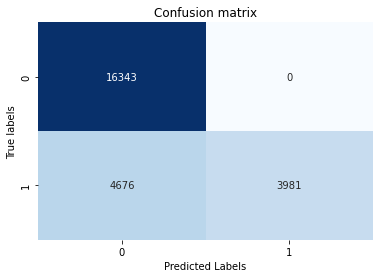

In [65]:
sns.heatmap(cm , annot =True , fmt = "d" , cmap = "Blues" , cbar = False)
plt.xlabel('Predicted Labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()

Test set 2:

0.9956713487899815
0.99565
0.9956145074601823
[[17640     0]
 [   87  2273]]


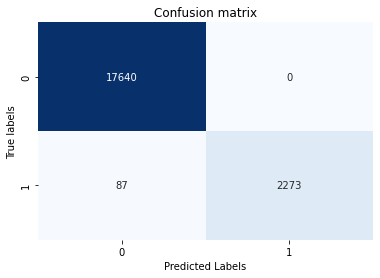

In [66]:
metrotest2_targets = metrotest2["target"].copy()
metrotest2 = metrotest2.drop('target' , axis=1)
metrotest2_tr = my_pipeline.transform(metrotest2)

predictions2= model.predict(metrotest2_tr)

predictions2
precision2 = precision_score(metrotest2_targets , predictions2 , average = 'weighted')
recall2 = recall_score(metrotest2_targets , predictions2 , average = 'weighted')
f1_score2 = f1_score(metrotest2_targets , predictions2 , average = 'weighted')

print(precision2)
print(recall2)
print(f1_score2)

cm2 = confusion_matrix(metrotest2_targets , predictions2)
print(cm2)


sns.heatmap(cm2 , annot =True , fmt = "d" , cmap = "Blues" , cbar = False)
plt.xlabel('Predicted Labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()

0.9113175729815312
0.9071666666666667
0.8868937329325118
[[10351    27]
 [ 1087   535]]


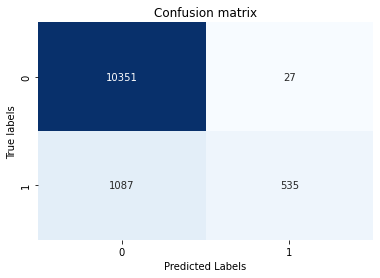

In [70]:
metrotest3_targets = metrotest3["target"].copy()
metrotest3 = metrotest3.drop('target' , axis=1)
metrotest3_tr = my_pipeline.transform(metrotest3)

predictions3 = model.predict(metrotest3_tr)

predictions3
precision3 = precision_score(metrotest3_targets , predictions3 , average = 'weighted')
recall3 = recall_score(metrotest3_targets , predictions3 , average = 'weighted')
f1_score3 = f1_score(metrotest3_targets , predictions3 , average = 'weighted')

print(precision3)
print(recall3)
print(f1_score3)

cm3 = confusion_matrix(metrotest3_targets , predictions3)
print(cm3)


sns.heatmap(cm3 , annot =True , fmt = "d" , cmap = "Blues" , cbar = False)
plt.xlabel('Predicted Labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()